In [106]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [116]:
data = pd.read_csv('bank-full.csv', delimiter=';')
print('Dimention:', data.shape)
print(data)

Dimention: (45211, 17)
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month 

In [154]:
x = data.drop(columns=['y'])
y = data['y']

Replacing texual data with numerical data

In [110]:
for column in x.columns:
    if x[column].dtype == 'object':
        keys = x[column].unique()
        mapping = {value: index for index, value in enumerate(set(keys))}
        x[column] = x[column].replace(mapping)

Normalizing trainig data

In [111]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

Applying PCA

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
x = pca.fit_transform(x)

Splitting the dataset into training and testing set

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print('Total: ', data.shape)
print('Train: ', x_train.shape)
print('Test: ', x_test.shape)

Total:  (45211, 17)
Train:  (33908, 13)
Test:  (11303, 13)


Feeding training data into the model

In [150]:
model = LogisticRegression(max_iter=50000, penalty='l2')
model.fit(x_train, y_train)

LogisticRegression(max_iter=50000)

Testing the model against testing data

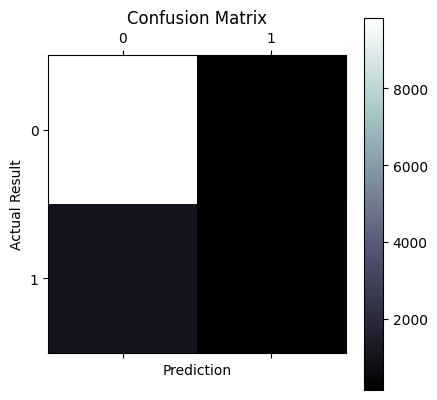

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

y_prediction = model.predict(x_test)

c_matrix = confusion_matrix(y_test, y_prediction)

plt.matshow(c_matrix, cmap=plt.cm.bone)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual Result")
plt.show()

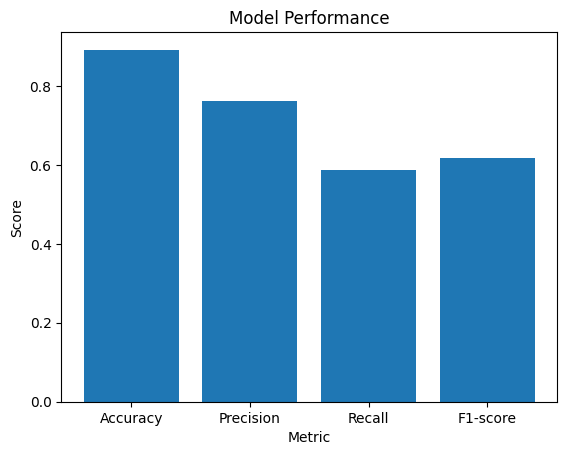

In [152]:
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average='macro')
recall = recall_score(y_test, y_prediction, average='macro')
f1_score = f1_score(y_test, y_prediction, average='macro')

metrics = [accuracy, precision, recall, f1_score]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.bar(labels, metrics)
plt.title("Model Performance")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.show()